<img src="Figures/logo_trans.png" width="180px" alt="LyonHPC" />
<img width="200px" src="Figures/python-logo.gif" alt="LyonHPC"/>

# Efficacité / complexité

<img src="cloud_sommaire.png" alt="cloud" width="400px"/>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Recherche d'un élément dans un tableau trié

Soit X un tableau contenant n valeurs triées, i.e: X[0]<X[1]<...<X[n-1]  
on veut déterminer l'indice k d'un élément a, i.e: X[k]=a

### algorithme de recherche linéaire

- on parcours toute la liste en partant du premier élément pour chercher a
- dans le pire des cas, on fait n itérations
- un test par itération $\Rightarrow$ n opérations

algorithme avec une **efficacité linéaire**: $O(n)$

In [2]:
def linsearch(a,X):
    """ recherche de  a dans le tableau X 
        retour: valeur de l'indice k tq X[k]=a, ou -1 si non trouvé 
    """
    n = len(X)
    k = -1
    for i in range(n):
        if X[i]==a :
            k = i
            break
    return k
# application
X=np.arange(10)
print(linsearch(5,X))
print(linsearch(10,X))

5
-1


### recherche par dichotomie (binary search)
on compare a chaque étape la valeur x du milieu du tableau avec a:

- si a > x, on recommence avec la moitié droite du tableau
- si a < x, on recommence avec la moitié gauche du tableau
- si a = x, on termine l'algorithme
- par itération: 2 opérations +  / et 2 tests
- $\log_2(n)$ itérations au maximum $\rightarrow$ $4*\log_2(n)$ opérations

algorithme avec une **efficacité logarithmique**: $O(\log(n))$

In [3]:
def dichotomie(a,X):
    """ recherche de a dans le tableau X 
        renvoie: l'indice k tq a=X(k] ou -1 si non trouvé """
    debut = 0
    fin = len(X)-1
    k = -1
    while (debut<=fin) and (k<0):
        milieu = (debut+fin)//2
        if X[milieu]==a :
            k = milieu
            break
        elif X[milieu]>a :
            fin = milieu
        else:
            debut = milieu
    return k
# application
X=np.arange(10)
print(dichotomie(5,X))

5


**remarque:** le programme précédent possède une erreur, car il est non générique !! 

- Pouvez vous la trouver et la corriger ? 
- (Conseil:) essayer dichotomie(10,X) !

### comparaison de l’efficacité des 2 algorithmes de trie

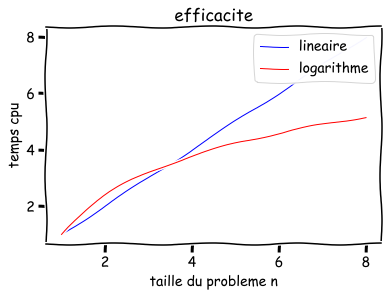

In [4]:
run courbe1.py

$\Rightarrow$ **pour n grand l'algorithme de trie par bisection est beaucoup plus efficace**

## Complexité et efficacité d'un algorithme

**théorie de la complexité:** analyse d'un algorithme en vue de déterminer les ressources nécessaire (en temps CPU, en taille mémoire,..)  pour l’exécuter en fonction des données (taille des données, paramètre de précision).

**efficacité** = estimation asymptotique de la complexité en temps sur une machine idéale (machine de Turing) en fonction d'un paramètre n caractérisant les entrées (taille des entrées, nbre de digits pour la précision,..)

**attention** cette analyse n'est qu'indicative, et peut être remise en question suivant l'architecture des machines (machines parallèles)

### Différentes classes de compléxité (classées par efficacité)

type           | complexité   | example 
----------     | -----------  | --------
constante      | $O(1)$       | accés à un tableau: X[i] 
logarithmique  | $O(\log{n})$  | trie par dichotomie (binary search)
linéaire       | $O(n)$       | parcours de tableaux
linéarithmique | $O(n\log{n}$ | methode multigrille 
quadratique    | $O(n^2)$     | produit matrice x vecteur
cubique        | $O(n^3)$     | produit matrice x matrice
exponentielle  | $O(2^{n^p})$  |
factorielle    | $O(n!)$      | calcul déterminant d'une matrice (force brute)

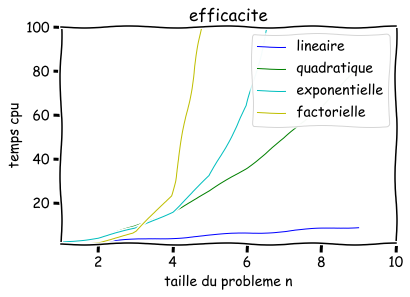

In [5]:
run courbe2.py

## Exemples

### algorithme inefficace: déterminant de Cramer

Calcul du déterminant d'une matrice $A$ par la méthode de Cramer 
- formule récursive de calcul par développement  par rapport à la première colonne

$$ det(A) = \sum_{j=1}^n A_{1,j} (-1)^{1+j} det(A^{1,j}) $$

- $A^{1,j}$ matrice d'ordre n-1 obtenue en enlevant la colonne 1 et la ligne i de $A$  
- calcul det(A) = somme de n déterminants d'ordre (n-1) 

$\Rightarrow$ algorithme avec une efficacité factorielle: $O(n!)$

In [7]:
# nbre d'operations
nops = 0
# algorithme déterminant
def determinant(A):
    """ Calcul du déterminant de A """
    global nops
    n=shape(A)[0]
    if n==1:
        return A[0,0]
    else:
        det =0.0
        coef=1.0
        # developement par rapport a la ligne 0
        for i in range(n):
            A1 = delete(delete(A,0,0),i,1)
            det = det + coef*A[0,i]*determinant(A1)
            coef = -coef
        nops += 3*n
        return det
# test d'utilisation avec timing
from time import process_time
N=range(5,10)
# boucle de timing 
for k,n in enumerate(N):
    A=random.rand(n,n)
    nops = 0
    debut= process_time()
    det1 = determinant(A)
    cpu  = process_time() - debut
    print("n=%d nops=%10d cpu=%12.6g s"%(n,nops,cpu))


n=5 nops=       615 cpu=    0.016454
n=6 nops=      3708 cpu=   0.0593859
n=7 nops=     25977 cpu=   0.0988442
n=8 nops=    207840 cpu=    0.685302
n=9 nops=   1870587 cpu=     6.21617


$\Rightarrow$ **algorithme inutilisable** !!!!  
$\Rightarrow$ utiliser l'algorithme de la bibliothéque numpy basé sur une factorisation $LU$ de $A$

In [8]:
print(shape(A))
%timeit linalg.det(A)

(9, 9)
5.53 µs ± 60.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Exemple: recherche de la racine d'une fonction

Calcul d'une valeur approchée $x^n$ de la racine $x^*$ d'une fonction $f(x)$:

$$  \left| x^* - x^n \right| < \epsilon \mbox{ avec } f(x^*)=0 $$ 

Le nombre de chiffres significatifs $P$ de $x^n$ est donnée par  $P= -\log(\epsilon)$  
On compare l’efficacité de 2 algorithmes en fonction de $P$  
On suppose que l'on a un intervalle $[a,b]$ contenant la racine $x^*$ 

#### Méthode de dichotomie
- algorithme itératif de dichotomie
- on choisit comme approximation le milieu de l'intervalle
- à chaque itération: erreur divisée par 2 , 4 opérations + 1 appel de fonction
$\Rightarrow$ erreur divisée par $2^n$ au bout de n iterations

**efficacité linaire** $O(P)$ car le coût $\approx C*P + K $


In [9]:
# Algorithme Dichotomie
def Dichotomie(F,a,b,eps):
    """ calcul la racine de F(x) comprise entre a et b par dichotomie
        F(x) est une fonction , eps = précision """
    nit = 0
    ya = F(a)
    yb = F(b)
    x  = (a+b)/2.0
    while (b-a)>eps :
        x = (a+b)/2.
        y = F(x)
        if y*ya > 0:
            a=x
            ya=y
        else:
            b=x
            yb=y
        nit = nit + 1
    return x,nit
# application
F = cos
xs = pi/2.
x,it = Dichotomie(F,pi/3,3*pi/4,1.e-08)
print("racine %g  nit=%d  err=%g"%(x,it,abs(x-xs)))

racine 1.5708  nit=27  err=1.95056e-09


#### Méthode de Newton

- à partir de $x_0$, on approxime la courbe par sa tangente en $x_0$
- nouvelle approximation $x_1$ = intersection tangente avec l'axe des x

$$ x_1 = x_0 - \frac{F(x_0)}{F'(x_0)}$$

- l'erreur $err_1 = x_1 -x^*$ vérifie après D.L. de $F(x_0)$ 

$$ err_1 = err_0 - \frac{F(x_0)}{F'(x_0)} \approx \frac{1}{2}\frac{F''(x_0)}{F'(x_0)}({err_0})^2 + ..$$

- soit au bout de $n$ itérations $err_n \approx (err_0)^{2^n} $

**Efficacité logarithmique** $O(\log P)$ car coût $\approx C \log P + K$

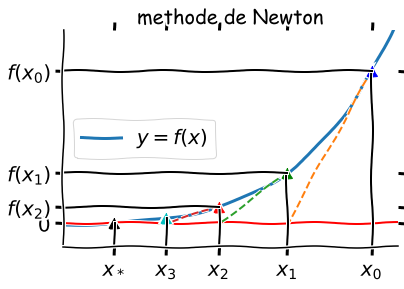

In [10]:
run newton.py

In [11]:
# Algorithme de Newton
def Newton(F,dF,a,b,eps):
    """ calcul la racine de F(x) par la methode de Newton
        F(x) fonction, dF dérivée, a b intervalle d'étude , eps = précision """
    nit = 0
    x   = (a+b)/2.
    err = F(x)/dF(x)
    while abs(err) > eps:
        x   = x - err
        err = F(x)/dF(x)
        nit = nit + 1
    return x,nit
# application
F  = lambda x:  cos(x)
dF = lambda x: -sin(x)
xs = pi/2.
x,it = Newton(F,dF,pi/3,3*pi/4,1.e-08)
print("racine %g  nit=%d  err=%g"%(x,it,abs(x-xs)))

racine 1.5708  nit=2  err=1.42208e-10


#### Conclusion
La méthode de Newton est beaucoup plus efficace que la méthode de dichotomie  
Attention cependant, la convergence de la méthode de Newton est uniquement locale !!!

# FIN de la leçon

<img src="cloud_sommaire.png" alt="cloud" width="400px"/>